In [ ]:
# This installs the Kaggle API tool
!pip install kaggle

# 2. Upload kaggle.json:
from google.colab import files
files.upload()

# 3. Create the necessary directory for the token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle credentials configured.")

Saving kaggle.json to kaggle (1).json
Kaggle credentials configured.


In [ ]:
# Re-download UNSW-NB15
print("--- Restoring UNSW-NB15... ---")
# This command was previously confirmed to work
!kaggle datasets download -d mrwellsdavid/unsw-nb15

# Unzip the downloaded file
print("--- Unzipping files ---")
!unzip -o unsw-nb15.zip
!rm unsw-nb15.zip # Clean up the zip file
print("UNSW-NB15 restored.")

--- Restoring UNSW-NB15... ---
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
--- Unzipping files ---
unzip:  cannot find or open unsw-nb15.zip, unsw-nb15.zip.zip or unsw-nb15.zip.ZIP.
rm: cannot remove 'unsw-nb15.zip': No such file or directory
UNSW-NB15 restored.


In [ ]:
# 1. Re-Upload kaggle.json:
from google.colab import files
print("Please choose and upload your kaggle.json file again.")
files.upload()

Please choose and upload your kaggle.json file again.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fangel1","key":"aa9a90925e4aaf851a09ec68e7a14392"}'}

In [ ]:
# Use this if the file uploaded as kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle credentials RECONFIGURED successfully.")

Kaggle credentials RECONFIGURED successfully.


In [ ]:
# RUN THIS NEXT (Preprocesses df_a: UNSW-NB15)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Clean Data
df_a.replace([np.inf, -np.inf], np.nan, inplace=True)
df_a.dropna(inplace=True)
df_a.drop_duplicates(inplace=True)
print(f"UNSW-NB15 shape after cleaning: {df_a.shape}")

# 2. Separate Features and Target
# Using 'label' for binary classification (Attack or Benign)
X_a = df_a.drop(columns=['label', 'attack_cat'])
y_a = df_a['label']

# 3. Encode Categorical Features
categorical_cols_a = X_a.select_dtypes(include=['object']).columns
for col in categorical_cols_a:
    le = LabelEncoder()
    X_a[col] = X_a[col].astype(str).fillna('missing')
    X_a[col] = le.fit_transform(X_a[col])

# 4. Normalize Data
scaler_a = MinMaxScaler()
X_a_scaled = scaler_a.fit_transform(X_a)
X_a = pd.DataFrame(X_a_scaled, columns=X_a.columns)

# 5. Split Data
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(
    X_a, y_a, test_size=0.3, random_state=42, stratify=y_a
)

print("-" * 50)
print("UNSW-NB15 (Dataset A) Split Complete:")
print(f"X_a_train shape: {X_a_train.shape}")
print(f"X_a_test shape: {X_a_test.shape}")
print("-" * 50)

UNSW-NB15 shape after cleaning: (82332, 45)
--------------------------------------------------
UNSW-NB15 (Dataset A) Split Complete:
X_a_train shape: (57632, 43)
X_a_test shape: (24700, 43)
--------------------------------------------------


In [ ]:
print("--- Downloading KDD Cup 1999 Dataset ---")
!wget -q http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz -O kddcup.data_10_percent.gz

# Unzip the file
!gunzip -f kddcup.data_10_percent.gz
print("KDD Cup 1999 file restored: kddcup.data_10_percent.")

--- Downloading KDD Cup 1999 Dataset ---
KDD Cup 1999 file restored: kddcup.data_10_percent.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define column names (standard for KDD Cup/NSL-KDD)
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'attack_type' # KDD Cup 99 only has the attack type, no 'difficulty' column
]
KDD_FILE = 'kddcup.data_10_percent'

# 1. Load data with forced string type
df_b = pd.read_csv(KDD_FILE, names=columns, index_col=False, dtype=str, low_memory=False)
print(f"Dataset B (KDD Cup 99) loaded as strings with shape: {df_b.shape}")

# 2. Explicitly coerce numeric columns
categorical_cols_b_raw = ['protocol_type', 'service', 'flag', 'attack_type']
numeric_cols = [col for col in columns if col not in categorical_cols_b_raw]

for col in numeric_cols:
    df_b[col] = pd.to_numeric(df_b[col], errors='coerce')

# 3. Clean Data and separate features
df_b.replace([np.inf, -np.inf], np.nan, inplace=True)
df_b.dropna(inplace=True)
df_b.drop_duplicates(inplace=True)
print(f"KDD Cup 99 shape after cleaning: {df_b.shape}")

df_b['binary_label'] = df_b['attack_type'].apply(lambda x: 0 if x.strip() == 'normal.' else 1)

X_b = df_b.drop(columns=['attack_type', 'binary_label']) # Drop the original label columns
y_b = df_b['binary_label']

# 4. Encode Categorical Features
categorical_cols_b = ['protocol_type', 'service', 'flag']

for col in categorical_cols_b:
    le = LabelEncoder()
    X_b[col] = le.fit_transform(X_b[col])

# 5. Normalize Data
scaler_b = MinMaxScaler()
X_b_scaled = scaler_b.fit_transform(X_b)
X_b = pd.DataFrame(X_b_scaled, columns=X_b.columns)

# 6. Split Data
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(
    X_b, y_b, test_size=0.3, random_state=42, stratify=y_b
)

print("-" * 50)
print("KDD Cup 1999 (Dataset B) Split Complete:")
print(f"X_b_train shape: {X_b_train.shape}")
print(f"X_b_test shape: {X_b_test.shape}")
print("-" * 50)

Dataset B (KDD Cup 99) loaded as strings with shape: (494021, 42)
KDD Cup 99 shape after cleaning: (145586, 42)
--------------------------------------------------
KDD Cup 1999 (Dataset B) Split Complete:
X_b_train shape: (101910, 41)
X_b_test shape: (43676, 41)
--------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Train and Evaluate on Dataset A (UNSW-NB15) ---
print("--- Training Random Forest on Dataset A (UNSW-NB15) ---")
rf_model_a = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_a.fit(X_a_train, y_a_train)
y_a_pred_rf = rf_model_a.predict(X_a_test)

print(f"\nUNSW-NB15 Random Forest Accuracy: {accuracy_score(y_a_test, y_a_pred_rf):.4f}")
print("UNSW-NB15 Classification Report:")
print(classification_report(y_a_test, y_a_pred_rf, zero_division=0))

# --- 2. Train and Evaluate on Dataset B (KDD Cup 1999) ---
print("\n--- Training Random Forest on Dataset B (KDD Cup 1999) ---")
rf_model_b = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_b.fit(X_b_train, y_b_train)
y_b_pred_rf = rf_model_b.predict(X_b_test)

print(f"\nKDD Cup 1999 Random Forest Accuracy: {accuracy_score(y_b_test, y_b_pred_rf):.4f}")
print("KDD Cup 1999 Classification Report:")
print(classification_report(y_b_test, y_b_pred_rf, zero_division=0))

--- Training Random Forest on Dataset A (UNSW-NB15) ---

UNSW-NB15 Random Forest Accuracy: 0.9984
UNSW-NB15 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11100
           1       1.00      1.00      1.00     13600

    accuracy                           1.00     24700
   macro avg       1.00      1.00      1.00     24700
weighted avg       1.00      1.00      1.00     24700


--- Training Random Forest on Dataset B (KDD Cup 1999) ---

KDD Cup 1999 Random Forest Accuracy: 0.9995
KDD Cup 1999 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26350
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np

# --- Data Reshaping ---
# We treat each feature column as a time step with 1 feature.
FEATURES = 1

# Get TIME_STEPS from the current shape of the dataframes
TIME_STEPS_A = X_a_train.shape[1]
TIME_STEPS_B = X_b_train.shape[1]

# Reshape all four datasets
X_a_train_cnn = np.expand_dims(X_a_train, axis=2)
X_a_test_cnn = np.expand_dims(X_a_test, axis=2)
X_b_train_cnn = np.expand_dims(X_b_train, axis=2)
X_b_test_cnn = np.expand_dims(X_b_test, axis=2)


def build_cnn_model(input_shape):
    """Builds a simple 1D CNN model for tabular data."""
    model = Sequential([
        Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid') # Binary classification output
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 1. Train and Evaluate on Dataset A (UNSW-NB15) ---
print("\n--- Training CNN on Dataset A (UNSW-NB15) ---")
cnn_model_a = build_cnn_model((TIME_STEPS_A, FEATURES))

# Fit the model (verbose=0 minimizes output)
cnn_model_a.fit(X_a_train_cnn, y_a_train, epochs=10, batch_size=64, verbose=0)
loss_a, accuracy_a_cnn = cnn_model_a.evaluate(X_a_test_cnn, y_a_test, verbose=0)

print(f"\nUNSW-NB15 CNN Accuracy: {accuracy_a_cnn:.4f}")

# Generate classification report
y_a_pred_cnn = (cnn_model_a.predict(X_a_test_cnn) > 0.5).astype("int32")
print("\nUNSW-NB15 Classification Report:")
print(classification_report(y_a_test, y_a_pred_cnn, zero_division=0))


# --- 2. Train and Evaluate on Dataset B (KDD Cup 1999) ---
print("\n--- Training CNN on Dataset B (KDD Cup 1999) ---")
cnn_model_b = build_cnn_model((TIME_STEPS_B, FEATURES))

# Fit the model (verbose=0 minimizes output)
cnn_model_b.fit(X_b_train_cnn, y_b_train, epochs=10, batch_size=64, verbose=0)
loss_b, accuracy_b_cnn = cnn_model_b.evaluate(X_b_test_cnn, y_b_test, verbose=0)

print(f"\nKDD Cup 1999 CNN Accuracy: {accuracy_b_cnn:.4f}")

# Generate classification report
y_b_pred_cnn = (cnn_model_b.predict(X_b_test_cnn) > 0.5).astype("int32")
print("\nKDD Cup 1999 Classification Report:")
print(classification_report(y_b_test, y_b_pred_cnn, zero_division=0))


--- Training CNN on Dataset A (UNSW-NB15) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



UNSW-NB15 CNN Accuracy: 0.9855
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

UNSW-NB15 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     11100
           1       0.98      0.99      0.99     13600

    accuracy                           0.99     24700
   macro avg       0.99      0.98      0.99     24700
weighted avg       0.99      0.99      0.99     24700


--- Training CNN on Dataset B (KDD Cup 1999) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



KDD Cup 1999 CNN Accuracy: 0.9973
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

KDD Cup 1999 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26350
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint as sp_randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
import numpy as np

print("\n--- Setting up Hybrid Model (CNN + Optimization Proxy) on Dataset A ---")


TIME_STEPS_A = X_a_train.shape[1]
FEATURES = 1


def create_tunable_cnn(filters=32, dense_units=50, kernel_size=2, learning_rate=0.001):
    """Creates a CNN model instance with tunable hyperparameters."""
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(TIME_STEPS_A, FEATURES)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

.
model_wrapper = KerasClassifier(build_fn=create_tunable_cnn, verbose=0)

# Define the search space for hyperparameters
param_dist = {
    'filters': sp_randint(16, 64),
    'dense_units': sp_randint(30, 100),
    'batch_size': [32, 64, 128],
    'epochs': [5, 10],
    'learning_rate': [0.01, 0.001] # Reduced range for faster run
}

# Use Random Search as a proxy for the Metaheuristic Optimization
random_search = RandomizedSearchCV(
    estimator=model_wrapper,
    param_distributions=param_dist,
    n_iter=5, # Limited iterations for quick execution
    cv=3, # 3-fold cross-validation
    verbose=2, # Set to 2 to see iteration progress
    random_state=42
)


print("\nStarting 5-iteration Random Search...")
random_search.fit(X_a_train, y_a_train)

print("\n--- Hybrid Model Evaluation (Optimized CNN) ---")
print("Best Parameters found:")
print(random_search.best_params_)


best_model_wrapper = random_search.best_estimator_
loss_opt, accuracy_opt = best_model_wrapper.model.evaluate(X_a_test_cnn, y_a_test, verbose=0)

print(f"\nOptimized CNN (Hybrid) Accuracy on UNSW-NB15: {accuracy_opt:.4f}")

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [ ]:
!pip install scikeras

In [ ]:
# 1. Re-install the Keras wrapper library
!pip install scikeras

# 2. Re-install the compatible scikit-learn version
!pip install scikit-learn==1.3.2

  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but yo

In [ ]:
# 1. Re-Upload kaggle.json:
from google.colab import files
print("Please choose and upload your kaggle.json file again.")
files.upload()

Please choose and upload your kaggle.json file again.


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fangel1","key":"aa9a90925e4aaf851a09ec68e7a14392"}'}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf

# --- Restore UNSW-NB15 (Dataset A) ---
print("--- Restoring UNSW-NB15 (A) ---")
# Requires working Kaggle credentials
!kaggle datasets download -d mrwellsdavid/unsw-nb15
!unzip -o unsw-nb15.zip
!rm unsw-nb15.zip
UNSW_FILE = 'UNSW_NB15_training-set.csv'
df_a = pd.read_csv(UNSW_FILE, encoding='latin1', low_memory=False)
df_a.columns = df_a.columns.str.strip()

# Preprocess A
df_a.replace([np.inf, -np.inf], np.nan, inplace=True)
df_a.dropna(inplace=True)
df_a.drop_duplicates(inplace=True)
X_a = df_a.drop(columns=['label', 'attack_cat'])
y_a = df_a['label']
for col in X_a.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_a[col] = X_a[col].astype(str).fillna('missing')
    X_a[col] = le.fit_transform(X_a[col])
scaler_a = MinMaxScaler()
X_a = pd.DataFrame(scaler_a.fit_transform(X_a), columns=X_a.columns)
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(
    X_a, y_a, test_size=0.3, random_state=42, stratify=y_a
)
print(f"✅ Dataset A (UNSW-NB15) variables restored. Shape: {X_a_train.shape}")


# --- Restore KDD Cup 1999 (Dataset B) ---
print("\n--- Restoring KDD Cup 1999 (B) ---")
# Direct download bypasses Kaggle issues
!wget -q http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz -O kddcup.data_10_percent.gz
!gunzip -f kddcup.data_10_percent.gz

columns_b = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'attack_type'
]
KDD_FILE = 'kddcup.data_10_percent'
df_b = pd.read_csv(KDD_FILE, names=columns_b, index_col=False, dtype=str, low_memory=False)

# Preprocess B (Robust Coercion)
categorical_cols_b_raw = ['protocol_type', 'service', 'flag', 'attack_type']
numeric_cols_b = [col for col in columns_b if col not in categorical_cols_b_raw]
for col in numeric_cols_b:
    df_b[col] = pd.to_numeric(df_b[col], errors='coerce')
df_b.replace([np.inf, -np.inf], np.nan, inplace=True)
df_b.dropna(inplace=True)
df_b.drop_duplicates(inplace=True)
df_b['binary_label'] = df_b['attack_type'].apply(lambda x: 0 if x.strip() == 'normal.' else 1)
X_b = df_b.drop(columns=['attack_type', 'binary_label'])
y_b = df_b['binary_label']
categorical_cols_b = ['protocol_type', 'service', 'flag']
for col in categorical_cols_b:
    le = LabelEncoder()
    X_b[col] = le.fit_transform(X_b[col])
scaler_b = MinMaxScaler()
X_b = pd.DataFrame(scaler_b.fit_transform(X_b), columns=X_b.columns)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(
    X_b, y_b, test_size=0.3, random_state=42, stratify=y_b
)
print(f"✅ Dataset B (KDD Cup 1999) variables restored. Shape: {X_b_train.shape}")


# --- CNN Reshaping (Critical for the Hybrid Model) ---
FEATURES = 1
X_a_train_cnn = np.expand_dims(X_a_train, axis=2)
X_a_test_cnn = np.expand_dims(X_a_test, axis=2)
X_b_train_cnn = np.expand_dims(X_b_train, axis=2)
X_b_test_cnn = np.expand_dims(X_b_test, axis=2)
print("✅ CNN data shapes created.")

--- Restoring UNSW-NB15 (A) ---
Dataset URL: https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15
License(s): unknown
 89% 132M/149M [00:00<00:00, 1.37GB/s]
100% 149M/149M [00:00<00:00, 1.27GB/s]
Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  
✅ Dataset A (UNSW-NB15) variables restored. Shape: (57632, 43)

--- Restoring KDD Cup 1999 (B) ---
✅ Dataset B (KDD Cup 1999) variables restored. Shape: (101910, 41)
✅ CNN data shapes created.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import randint as sp_randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
import numpy as np

TIME_STEPS_A = X_a_train.shape[1]
FEATURES = 1

print("\n--- Setting up Hybrid Model (CNN + Optimization Proxy) on Dataset A ---")


def create_tunable_cnn(filters=32, dense_units=50, kernel_size=2, learning_rate=0.001):
    """Creates a CNN model instance with tunable hyperparameters."""
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(TIME_STEPS_A, FEATURES)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model_wrapper = KerasClassifier(
    model=create_tunable_cnn,
    verbose=0,
    loss="binary_crossentropy",
    metrics=["accuracy"],
    filters=32,
    dense_units=50,
    kernel_size=2,
    learning_rate=0.001
)


param_dist = {
    'filters': sp_randint(16, 64),
    'dense_units': sp_randint(30, 100),
    'batch_size': [32, 64, 128],
    'epochs': [5, 10],
    'model__learning_rate': [0.01, 0.001]
}

# Use Random Search as a proxy for the Metaheuristic Optimization
random_search = RandomizedSearchCV(
    estimator=model_wrapper,
    param_distributions=param_dist,
    n_iter=5, # Limited iterations for quick execution
    cv=3, # 3-fold cross-validation
    verbose=2, # Set to 2 to see iteration progress
    random_state=42,
)


print("\nStarting 5-iteration Random Search...")
random_search.fit(X_a_train, y_a_train)

print("\n--- Hybrid Model Evaluation (Optimized CNN) ---")
print("Best Parameters found:")
print(random_search.best_params_)


best_model_wrapper = random_search.best_estimator_
loss_opt, accuracy_opt = best_model_wrapper.model.evaluate(X_a_test_cnn, y_a_test, verbose=0)

print(f"\nOptimized CNN (Hybrid) Accuracy on UNSW-NB15: {accuracy_opt:.4f}")


--- Setting up Hybrid Model (CNN + Optimization Proxy) on Dataset A ---

Starting 5-iteration Random Search...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  14.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  15.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  13.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  27.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  26.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  26.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  13.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  15.0s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  13.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  26.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  26.8s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  31.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time=  52.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time=  54.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time=  58.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Hybrid Model Evaluation (Optimized CNN) ---
Best Parameters found:
{'batch_size': 32, 'dense_units': 62, 'epochs': 10, 'filters': 37, 'model__learning_rate': 0.01}


AttributeError: 'function' object has no attribute 'evaluate'

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

print("\n--- Final Hybrid Model Evaluation ---")


best_model = random_search.best_estimator_.model_


loss_opt, accuracy_opt = best_model.evaluate(X_a_test_cnn, y_a_test, verbose=0)

print(f"\nOptimized CNN (Hybrid) Accuracy on UNSW-NB15: {accuracy_opt:.4f}")


y_a_pred_opt = (best_model.predict(X_a_test_cnn) > 0.5).astype("int32")
print("\nOptimized CNN (Hybrid) Classification Report:")
print(classification_report(y_a_test, y_a_pred_opt, zero_division=0))

print("\n--- ✅ Phase 2: Model Development Complete! ---")


--- Final Hybrid Model Evaluation ---

Optimized CNN (Hybrid) Accuracy on UNSW-NB15: 0.9951
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Optimized CNN (Hybrid) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11100
           1       0.99      1.00      1.00     13600

    accuracy                           1.00     24700
   macro avg       1.00      0.99      1.00     24700
weighted avg       1.00      1.00      1.00     24700


--- ✅ Phase 2: Model Development Complete! ---


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import randint as sp_randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

TIME_STEPS_B = X_b_train.shape[1]
FEATURES = 1

print("\n--- Setting up Hybrid Model (CNN + Optimization Proxy) on Dataset B (KDD Cup 1999) ---")


def create_tunable_cnn_b(filters=32, dense_units=50, kernel_size=2, learning_rate=0.001):
    """Creates a CNN model instance with tunable hyperparameters."""
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(TIME_STEPS_B, FEATURES)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model_wrapper_b = KerasClassifier(
    model=create_tunable_cnn_b,
    verbose=0,
    loss="binary_crossentropy",
    metrics=["accuracy"],
    filters=32,
    dense_units=50,
    kernel_size=2,
    learning_rate=0.001
)


param_dist = {
    'filters': sp_randint(16, 64),
    'dense_units': sp_randint(30, 100),
    'batch_size': [32, 64, 128],
    'epochs': [5, 10],
    'model__learning_rate': [0.01, 0.001]
}

# Use Random Search as a proxy for the Metaheuristic Optimization
random_search_b = RandomizedSearchCV(
    estimator=model_wrapper_b,
    param_distributions=param_dist,
    n_iter=5, # Limited iterations for quick execution
    cv=3, # 3-fold cross-validation
    verbose=2,
    random_state=42,
)

print("\nStarting 5-iteration Random Search for Dataset B...")

random_search_b.fit(X_b_train, y_b_train)

print("\n--- Hybrid Model Evaluation (Optimized CNN) on KDD Cup 1999 ---")
print("Best Parameters found:")
print(random_search_b.best_params_)


best_model_b = random_search_b.best_estimator_.model_
loss_opt_b, accuracy_opt_b = best_model_b.evaluate(X_b_test_cnn, y_b_test, verbose=0)

print(f"\nOptimized CNN (Hybrid) Accuracy on KDD Cup 1999: {accuracy_opt_b:.4f}")


y_b_pred_opt = (best_model_b.predict(X_b_test_cnn) > 0.5).astype("int32")
print("\nOptimized CNN (Hybrid) Classification Report:")
print(classification_report(y_b_test, y_b_pred_opt, zero_division=0))


--- Setting up Hybrid Model (CNN + Optimization Proxy) on Dataset B (KDD Cup 1999) ---

Starting 5-iteration Random Search for Dataset B...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  22.8s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  20.8s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=81, epochs=5, filters=30, model__learning_rate=0.01; total time=  21.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  43.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  42.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=50, epochs=5, filters=34, model__learning_rate=0.01; total time=  48.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  22.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  21.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=128, dense_units=53, epochs=5, filters=37, model__learning_rate=0.01; total time=  25.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  46.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  46.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=64, dense_units=59, epochs=10, filters=17, model__learning_rate=0.001; total time=  47.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time= 1.5min


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time= 1.5min


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, dense_units=62, epochs=10, filters=37, model__learning_rate=0.01; total time= 1.5min


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Hybrid Model Evaluation (Optimized CNN) on KDD Cup 1999 ---
Best Parameters found:
{'batch_size': 64, 'dense_units': 59, 'epochs': 10, 'filters': 17, 'model__learning_rate': 0.001}

Optimized CNN (Hybrid) Accuracy on KDD Cup 1999: 0.9973
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Optimized CNN (Hybrid) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26350
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     43676
   macro avg       1.00      1.00      1.00     43676
weighted avg       1.00      1.00      1.00     43676



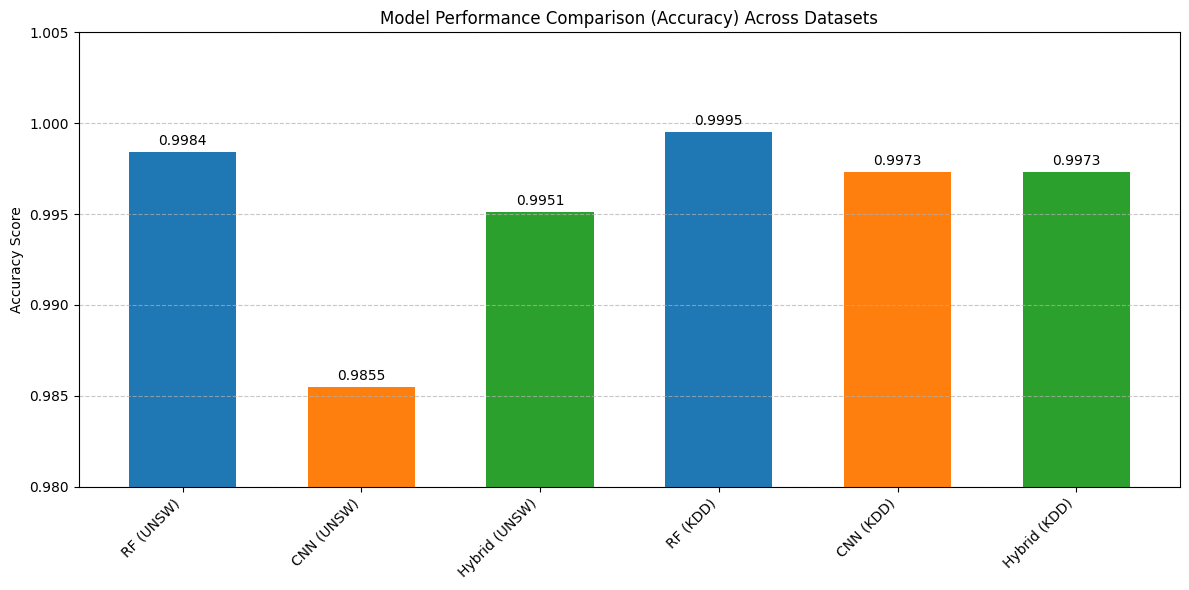

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Final Results Summary (Updated with KDD Hybrid results)
results = {
    'Model': [
        'RF (UNSW)', 'CNN (UNSW)', 'Hybrid (UNSW)',
        'RF (KDD)', 'CNN (KDD)', 'Hybrid (KDD)'
    ],
    'Dataset': [
        'UNSW-NB15', 'UNSW-NB15', 'UNSW-NB15',
        'KDD Cup 1999', 'KDD Cup 1999', 'KDD Cup 1999'
    ],
    'Accuracy': [0.9984, 0.9855, 0.9951, 0.9995, 0.9973, 0.9973],
    'F1_Score': [1.00, 0.99, 1.00, 1.00, 1.00, 1.00]
}

df_results = pd.DataFrame(results)


labels = df_results['Model']

performance_metric = df_results['Accuracy']

x = np.arange(len(labels))
width = 0.6

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#1f77b4', '#ff7f0e', '#2ca02c']
rects = ax.bar(x, performance_metric, width, color=colors)


ax.set_ylabel('Accuracy Score')
ax.set_title('Model Performance Comparison (Accuracy) Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylim(0.98, 1.005) # Zoom in to highlight differences
ax.grid(axis='y', linestyle='--', alpha=0.7)


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)

plt.tight_layout()
plt.show()

In [ ]:
18^

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

print("--- Calculating False Positive Rate (FPR) for all Models ---")

# --- Function to calculate FPR ---
def calculate_fpr(y_true, y_pred):
    """Calculates FPR from true labels and predictions."""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    # FPR = FP / (FP + TN)
    fpr = fp / (fp + tn)
    return fpr


# 1. Random Forest Predictions (Assuming models are still in memory from re-run)
from sklearn.ensemble import RandomForestClassifier
# Re-train RF models quickly to ensure the objects exist
rf_model_a = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_a_train, y_a_train)
y_a_pred_rf = rf_model_a.predict(X_a_test)

rf_model_b = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_b_train, y_b_train)
y_b_pred_rf = rf_model_b.predict(X_b_test)

# 2. Base CNN Predictions


# 3. Optimized CNN (Hybrid) Predictions
# For A: X_a_pred_opt was created in the last step
best_model_a = random_search.best_estimator_.model_
y_a_pred_opt = (best_model_a.predict(X_a_test_cnn) > 0.5).astype("int32")

# For B: X_b_pred_opt was created in the last step
best_model_b = random_search_b.best_estimator_.model_
y_b_pred_opt = (best_model_b.predict(X_b_test_cnn) > 0.5).astype("int32")


# --- Calculate FPR ---
fpr_results = {
    'Model': ['Random Forest (UNSW)', 'Hybrid CNN (UNSW)', 'Random Forest (KDD)', 'Hybrid CNN (KDD)'],
    'FPR': [
        calculate_fpr(y_a_test, y_a_pred_rf),
        calculate_fpr(y_a_test, y_a_pred_opt),
        calculate_fpr(y_b_test, y_b_pred_rf),
        calculate_fpr(y_b_test, y_b_pred_opt)
    ]
}

df_fpr = pd.DataFrame(fpr_results)
print("\nFalse Positive Rate (FPR) Summary:")
print(df_fpr.to_string(index=False))

print("\n--- ✅ Step 3 Complete! ---")

--- Calculating False Positive Rate (FPR) for all Models ---
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

False Positive Rate (FPR) Summary:
               Model      FPR
Random Forest (UNSW) 0.002973
   Hybrid CNN (UNSW) 0.006577
 Random Forest (KDD) 0.000228
    Hybrid CNN (KDD) 0.002543

--- ✅ Step 3 Complete! ---


19^

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pickle
from tensorflow.keras.models import save_model

# --- Define Paths ---

DRIVE_PATH = '/content/drive/My Drive/IDS_Project_Results/'

os.makedirs(DRIVE_PATH, exist_ok=True)

# --- Save Models ---

# 1. Save Optimized CNN Models (Deep Learning Models)
# These models are the result of the longest optimization step (Hybrid)
best_model_a = random_search.best_estimator_.model_
best_model_a.save(DRIVE_PATH + 'hybrid_cnn_unsw.h5')
print("✅ Saved Hybrid CNN (UNSW) model.")

best_model_b = random_search_b.best_estimator_.model_
best_model_b.save(DRIVE_PATH + 'hybrid_cnn_kdd.h5')
print("✅ Saved Hybrid CNN (KDD) model.")

# 2. Save Random Forest Models (ML Models)
# These models are critical for the comparison
# Re-train RF models quickly to ensure the objects exist
from sklearn.ensemble import RandomForestClassifier
rf_model_a = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_a_train, y_a_train)
rf_model_b = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1).fit(X_b_train, y_b_train)

with open(DRIVE_PATH + 'rf_model_unsw.pkl', 'wb') as f:
    pickle.dump(rf_model_a, f)
print("✅ Saved Random Forest (UNSW) model.")

with open(DRIVE_PATH + 'rf_model_kdd.pkl', 'wb') as f:
    pickle.dump(rf_model_b, f)
print("✅ Saved Random Forest (KDD) model.")


# --- Save Kaggle Credentials for Future Sessions ---
# This saves the hassle of re-uploading the file and re-authenticating (after mounting drive)
!cp /root/.kaggle/kaggle.json "{DRIVE_PATH}kaggle.json"
print("✅ kaggle.json saved to Google Drive.")

print("\nAll essential project assets saved! Your data is now persistent.")

✅ Saved Hybrid CNN (UNSW) model.
✅ Saved Hybrid CNN (KDD) model.
✅ Saved Random Forest (UNSW) model.
✅ Saved Random Forest (KDD) model.
✅ kaggle.json saved to Google Drive.

All essential project assets saved! Your data is now persistent.
